In [2]:
import os
import torch
import numpy as np
os.chdir("/data/adv_geom/src")
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits()


In [3]:
# plt.hist(train_set.normed_all_smooth_distances.numpy()[:, 0])
# plt.show()
# plt.plot(sorted(train_set.normed_all_smooth_distances.numpy()[:, 0]))
# plt.show()

In [2]:
data_dir = "/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k500n500_noninfdist/data"


train_set, val_set, test_set = ConcentricSpheres.load_splits(data_dir)


In [3]:
train_set.S1.genattrs.points_k

tensor([[ 0.6980,  0.0270, -0.8138,  ..., -0.8134, -0.3523, -0.3968],
        [ 0.5880,  0.0447, -0.8014,  ..., -0.7344, -0.2158, -0.3765],
        [ 0.7333, -0.0373, -0.7862,  ..., -0.8077, -0.2584, -0.3523],
        ...,
        [ 0.6413,  0.0536, -0.7670,  ..., -0.7649, -0.3314, -0.4120],
        [ 0.6743,  0.0367, -0.8053,  ..., -0.7417, -0.3185, -0.4228],
        [ 0.6182,  0.0728, -0.7512,  ..., -0.7341, -0.2590, -0.3914]])

In [4]:
train_set.S1.genattrs.pre_images_k

array([[ 0.74011648,  0.09419041, -0.81650288, ..., -0.75476242,
        -0.32467445, -0.39944989],
       [ 0.63660285, -0.00484816, -0.80332013, ..., -0.71342718,
        -0.32382311, -0.38855086],
       [ 0.67541621,  0.09808516, -0.79387478, ..., -0.75870311,
        -0.29113758, -0.3475567 ],
       ...,
       [ 0.73511706, -0.04609735, -0.78623424, ..., -0.78473719,
        -0.34365632, -0.37964919],
       [ 0.64053337,  0.10537302, -0.81360681, ..., -0.69893411,
        -0.33801576, -0.41970482],
       [ 0.67301301,  0.04938741, -0.7652833 , ..., -0.80740944,
        -0.39927791, -0.42435013]])

In [3]:
# val_logits = torch.load("/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expD_distlearner_against_adv_eg/rdm_concspheres/rdm_concspheres_k500n500_noninfsmoothdist/1/logits/val/logits.pt")
# val_targets = torch.load("/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expD_distlearner_against_adv_eg/rdm_concspheres/rdm_concspheres_k500n500_noninfsmoothdist/1/logits/val/targets.pt")

val_logits = torch.load("/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k500n500_noninfdist_online_datagen/1/logits/val/logits.pt")
val_targets = torch.load("/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k500n500_noninfdist_online_datagen/1/logits/val/targets.pt")


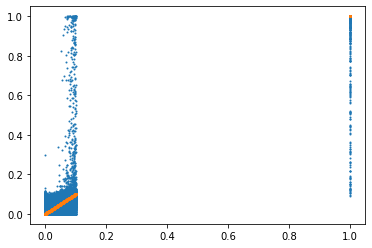

In [7]:
import matplotlib.pyplot as plt
plt.scatter(val_set.normed_all_actual_distances.numpy()[:, 1], val_logits.numpy()[:, 1], s=1)
plt.scatter(val_set.normed_all_actual_distances.numpy()[:, 1], val_set.normed_all_actual_distances.numpy()[:, 1], s=1)

plt.show()


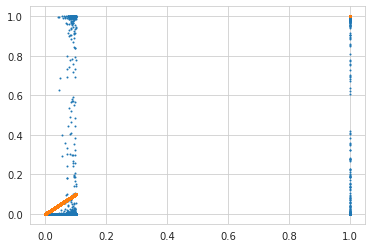

In [17]:
import matplotlib.pyplot as plt
plt.scatter(val_targets.numpy()[:, 1], val_logits.numpy()[:, 1], s=1)
plt.scatter(val_targets.numpy()[:, 1], val_targets[:, 1], s=1)

plt.show()

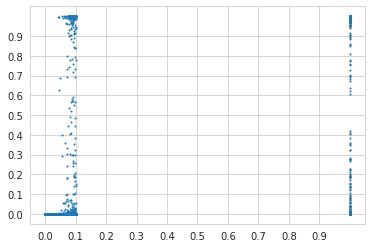

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# sns.regplot(x=val_targets.numpy()[:, 1], y=val_logits.numpy()[:, 1], scatter_kws={'s': 1})
plt.scatter(val_targets.numpy()[:, 1], val_logits.numpy()[:, 1], s=1)

plt.gca().set_xticks(np.arange(0, 1.0, 0.1))
plt.gca().set_yticks(np.arange(0, 1.0, 0.1))

# sns.regplot(val_targets.numpy()[:, 1], val_targets.numpy()[:, 1], scatter_kws={'s': 1})
plt.show()

Text(0.5, 1.0, 'k=500, n=500 noninf distance online datagen, error tol: 5e-2')

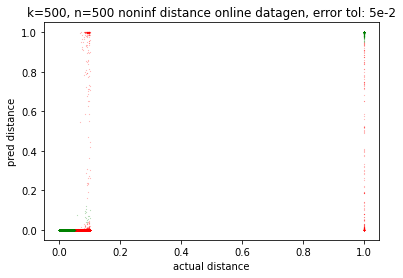

In [5]:
mask = np.abs(val_set.normed_all_actual_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 5e-2
colors = ["red" if i is True else "green" for i in mask]
plt.scatter(val_set.normed_all_actual_distances.numpy()[mask, 0], val_logits.numpy()[mask, 0], s=0.01, c="red")
plt.scatter(val_set.normed_all_actual_distances.numpy()[np.logical_not(mask), 0], val_logits.numpy()[np.logical_not(mask), 0], s=0.01, c="green")
# plt.scatter(val_set.normed_all_smooth_distances.numpy()[:, 0], val_targets.numpy()[:, 0], s=1)
plt.xlabel("actual distance")
plt.ylabel("pred distance")
plt.title("k=500, n=500 noninf distance online datagen, error tol: 5e-2")


Text(0.5, 1.0, 'k=500, n=500 noninf smooth distance, error tol: 5e-2')

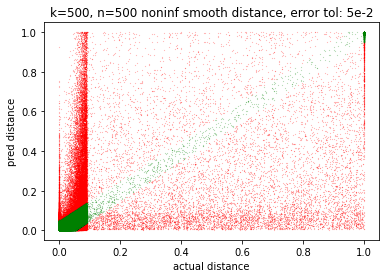

In [11]:
mask = np.abs(val_set.normed_all_smooth_distances.numpy().ravel() - val_logits.numpy().ravel()) >= 5e-2
colors = ["red" if i is True else "green" for i in mask]
plt.scatter(val_set.normed_all_smooth_distances.numpy().ravel()[mask], val_logits.numpy().ravel()[mask], s=0.01, c="red")
plt.scatter(val_set.normed_all_smooth_distances.numpy().ravel()[np.logical_not(mask)], val_logits.numpy().ravel()[np.logical_not(mask)], s=0.01, c="green")
# plt.scatter(val_set.normed_all_smooth_distances.numpy()[:, 0], val_targets.numpy()[:, 0], s=1)
plt.xlabel("actual distance")
plt.ylabel("pred distance")
plt.title("k=500, n=500 noninf smooth distance, error tol: 5e-2")

In [11]:
(np.abs(val_set.normed_all_smooth_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 1e-2

76849

In [58]:
(np.abs(val_set.normed_all_smooth_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 5e-2).shape

(200000,)

In [60]:
np.logical_not(mask)

array([False,  True,  True, ...,  True,  True,  True])

In [21]:
val_logits[:, 0][val_logits[:, 0] == 1] - val_set.normed_all_distances.numpy()[:, 0][val_logits[:, 0] == 1]

tensor([0.9300, 0.9300, 0.9300,  ..., 0.9300, 0.9300, 0.9300])

In [22]:
val_set.normed_all_distances.numpy()[:, 0][val_logits[:, 0] == 1]

array([0.07, 0.07, 0.07, ..., 0.07, 0.07, 0.07], dtype=float32)

In [25]:
((train_set.normed_all_actual_distances[:, 0] >= 0.09) & (train_set.normed_all_actual_distances[:, 0] <= 0.1)).sum()

tensor(25141)

In [28]:
(train_set.normed_all_actual_distances[:, 0] > 0.99).sum()

tensor(500000)

In [19]:
train_set.normed_all_actual_distances[:, 0].shape

torch.Size([1000000])

In [29]:
((train_set.normed_all_smooth_distances[:, 0] >= 0.09) & (train_set.normed_all_smooth_distances[:, 0] <= 0.99)).sum()

tensor(24890)